# Sudoku Solver 

Reference: Notes from CS 524 taught by Prof. Laurent Lessard (University of Wisconsin-Madison)

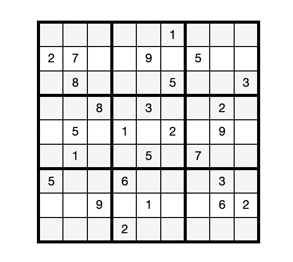

Your task is to fill in the grid in such a way that:

- Each row uses each of the numbers 1,2,...,9 exactly once
- Each column uses each of the numbers 1,2,...,9 exactly once
- Each smaller 3x3 square with a thick border uses each of the numbers 1,2,...,9 exactly once

In [4]:
using JuMP

In [5]:
using Cbc

In [4]:
# Given data. Unknown entries are specified as "0"
given = [
  0 0 0  0 0 1  0 0 0
  2 7 0  0 9 0  5 0 0
  0 8 0  0 0 5  0 0 3

  0 0 8  0 3 0  0 2 0
  0 5 0  1 0 2  0 9 0
  0 1 0  0 5 0  7 0 0

  5 0 0  6 0 0  0 3 0
  0 0 9  0 1 0  0 6 2
  0 0 0  2 0 0  0 0 0
];

In [5]:
function printSudoku(arr)
  u = 0
  println("+-------+-------+-------+")
  for p in 1:3:9
    for q in 0:2
      print("| ")
      for r in 1:3:9
        for s in 0:2
          u = round(Int, arr[p+q,r+s])
          u == 0 ? print(" ") : print(u)
          print(" ")
        end
        print("| ")
      end
      println()
    end
    println("+-------+-------+-------+")
  end
end
;

In [6]:
using JuMP, Cbc

m = Model(solver = CbcSolver())

@variable(m, x[1:9,1:9,1:9], Bin)

# exactly one number per cell
for i in 1:9
  for j in 1:9
    @constraint(m, sum(x[i,j,k] for k in 1:9) == 1)
  end
end

# exactly one of each number per row
for i in 1:9
  for k in 1:9
    @constraint(m, sum(x[i,j,k] for j in 1:9) == 1)
  end
end

# exactly one of each number per column
for j in 1:9
  for k in 1:9
    @constraint(m, sum(x[i,j,k] for i in 1:9) == 1)
  end
end

# exactly one of each number per 3x3 block
for k in 1:9
  for p in 0:3:6
    for q in 0:3:6
      @constraint(m, sum(x[p+i,q+j,k] for i in 1:3, j in 1:3) == 1)
    end
  end
end

# initial conditions
for i in 1:9
  for j in 1:9
    if given[i,j] != 0
      @constraint(m, x[i,j,given[i,j]] == 1)
    end
  end
end

@time(status = solve(m))

if status != :Optimal
    println(status)
else
    # generate solution grid and display the solution
    solution = zeros(9,9)
    for i in 1:9
      for j in 1:9
        for k in 1:9
          if getvalue(x[i,j,k]) == 1
            solution[i,j] = k
            continue
          end
        end
      end
    end

    println("The given problem is: ")
    printSudoku(given)

    println("The solution is: ")
    printSudoku(solution)
end

  0.040543 seconds (3.35 k allocations: 476.839 KiB)
The given problem is: 
+-------+-------+-------+
|       |     1 |       | 
| 2 7   |   9   | 5     | 
|   8   |     5 |     3 | 
+-------+-------+-------+
|     8 |   3   |   2   | 
|   5   | 1   2 |   9   | 
|   1   |   5   | 7     | 
+-------+-------+-------+
| 5     | 6     |   3   | 
|     9 |   1   |   6 2 | 
|       | 2     |       | 
+-------+-------+-------+
The solution is: 
+-------+-------+-------+
| 4 6 5 | 3 7 1 | 2 8 9 | 
| 2 7 3 | 8 9 6 | 5 1 4 | 
| 9 8 1 | 4 2 5 | 6 7 3 | 
+-------+-------+-------+
| 6 9 8 | 7 3 4 | 1 2 5 | 
| 7 5 4 | 1 6 2 | 3 9 8 | 
| 3 1 2 | 9 5 8 | 7 4 6 | 
+-------+-------+-------+
| 5 2 7 | 6 4 9 | 8 3 1 | 
| 8 3 9 | 5 1 7 | 4 6 2 | 
| 1 4 6 | 2 8 3 | 9 5 7 | 
+-------+-------+-------+
